# Hate Speech on Twitter
## Deliverable 05
## Amir ElTabakh
## 3/22/2022

This delivarble will focus on text analysis of the tweets, and creating visualizations based on the sentiments and the coordinates.

The dataset we are working with contains 6,752 tweets. When we scale the project to contain hundreds of thousands of tweets or millions these visualizations will scale accordingly.

### Agenda
- Text Analysis
- Visualizing sentiment
- Geomapping

## Text Analysis

In [1]:
import pandas as pd
%matplotlib inline

# importing dataset
tweet_dataset = pd.read_csv("covid19_tweets_01.csv")
tweet_dataset

created_at            id        id_str  \
0     2022-03-21 20:46:24-04:00  1.506070e+18  1.506070e+18   
1     2022-03-21 20:45:12-04:00  1.506070e+18  1.506070e+18   
2     2022-03-21 20:43:42-04:00  1.506070e+18  1.506070e+18   
3     2022-03-21 20:41:20-04:00  1.506070e+18  1.506070e+18   
4     2022-03-21 20:41:14-04:00  1.506070e+18  1.506070e+18   
...                         ...           ...           ...   
6747  2022-03-13 13:57:57-04:00  1.503070e+18  1.503070e+18   
6748  2022-03-13 13:57:53-04:00  1.503070e+18  1.503070e+18   
6749  2022-03-13 13:57:25-04:00  1.503070e+18  1.503070e+18   
6750  2022-03-13 13:53:51-04:00  1.503070e+18  1.503070e+18   
6751  2022-03-13 13:53:46-04:00  1.503070e+18  1.503070e+18   

                                                   text  \
0     Be well: A potential role for vitamin B in #CO...   
1     No se pierda el estreno de nuestro programa 6P...   
2     Will the One Millionth #COVID19 death win a pr...   
3     Don't Miss Our YouTube Premiere Tonight at 6PM...   
4     @PostOpinions @DrLeanaWen “…except if you’re u...   
...                                                 ...   
6747  China is spreading rumors on social media that...   
6748  If U.S. public health authorities took public ...   
6749  British scientist says flawed PCR tests mistoo...   
6750  This is what happens when you have a weak Admi...   
6751  Up to 30% of persons who are unvaccinated and ...   

                                           text_cleaned  truncated  \
0     well potential role vitamin b covid19 thiamine...      False   
1     se pierda el estreno de nuestro programa 6pm p...      False   
2     one millionth covid19 death win prize well fam...      False   
3     dont miss youtube premiere tonight 6pm pt 9 pm...      False   
4     postopinions drleanawen “ …except ’ 5 ’ care g...      False   
...                                                 ...        ...   
6747  china spreading rumors social media united sta...      False   
6748  us public health authorities took public healt...      False   
6749  british scientist says flawed pcr tests mistoo...      False   
6750  happens weak administration accountability chi...      False   
6751  30 persons unvaccinated get covid19 experienci...      False   

                               entities.hashtags  \
0     [{'text': 'COVID19', 'indices': [43, 51]}]   
1                                             []   
2     [{'text': 'COVID19', 'indices': [23, 31]}]   
3                                             []   
4     [{'text': 'covid19', 'indices': [79, 87]}]   
...                                          ...   
6747                                          []   
6748                                          []   
6749  [{'text': 'COVID19', 'indices': [70, 78]}]   
6750    [{'text': 'China', 'indices': [91, 97]}]   
6751  [{'text': 'covid19', 'indices': [50, 58]}]   

                                 entities.user_mentions  \
0                                                    []   
1                                                    []   
2                                                    []   
3                                                    []   
4     [{'screen_name': 'PostOpinions', 'name': 'Wash...   
...                                                 ...   
6747                                                 []   
6748                                                 []   
6749                                                 []   
6750                                                 []   
6751                                                 []   

                                                 source  \
0     <a href="https://mobile.twitter.com" rel="nofo...   
1     <a href="https://www.radaar.io/" rel="nofollow...   
2     <a href="http://twitter.com/download/android" ...   
3     <a href="https://www.radaar.io/" rel="nofollow...   
4     <a href="http://twitter.com/download/iphone" r...   
...                       

In [2]:
# generate corpus of text (object containing all words in `text_cleaned` with duplicates)
from nltk.tokenize import word_tokenize

corpus = []

for i in tweet_dataset['text_cleaned']:
    tweet = word_tokenize(i)
    corpus += [tweet[0]]

Below let's examine the most common words in the corpus.

In [3]:
# Most common words in Corpus
from collections import Counter

#Count Most Frequent Words
Counter = Counter(corpus)
most_occur = Counter.most_common(20) 
print(most_occur)

[('since', 391), ('covid19', 365), ('new', 116), ('’', 60), ('“', 58), ('coronavirus', 53), ('march', 44), ('covid', 37), ('today', 37), ('two', 36), ('china', 35), ('buy', 35), ('free', 32), ('us', 28), ('january', 27), ('great', 26), ('thank', 25), ('anyone', 24), ('potus', 24), ('good', 23)]


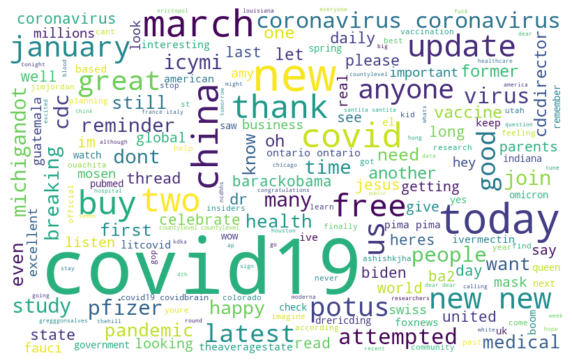

In [4]:
#Word Cloud for all `text_cleaned`
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Visualizing Sentiments

<AxesSubplot:title={'center':'Distribution of Sentiments - #Covid19'}, xlabel='Sentiment', ylabel='Count'>

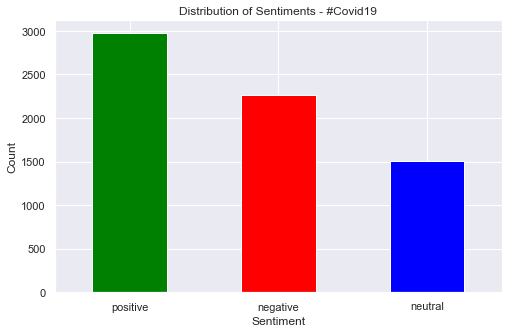

In [5]:
# distribution of sentiments
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set(rc={"figure.figsize":(8, 5)}) #width=3, #height=4

colors = ['green', 'red', 'blue']

tweet_dataset['sentiment'].value_counts().plot(kind = 'bar',
                                               title = "Distribution of Sentiments - #Covid19",
                                               xlabel = "Sentiment",
                                               ylabel = "Count",
                                               rot = 0,
                                               color = colors)

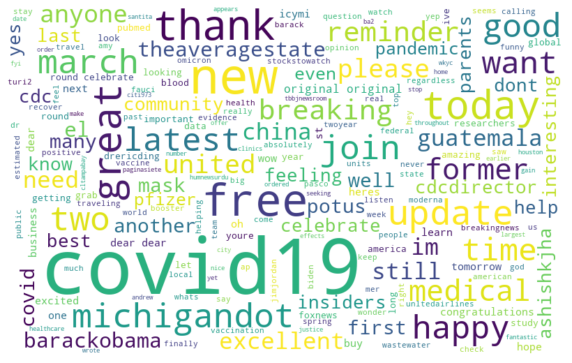

In [6]:
# Word Cloud for tweets that have positive sentiments
positive_tweets = tweet_dataset[tweet_dataset['sentiment'] == 'positive']

positive_corpus = []

for i in positive_tweets['text_cleaned']:
    tweet = word_tokenize(i)
    positive_corpus += [tweet[0]]
    
all_words = ' '.join([text for text in positive_corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

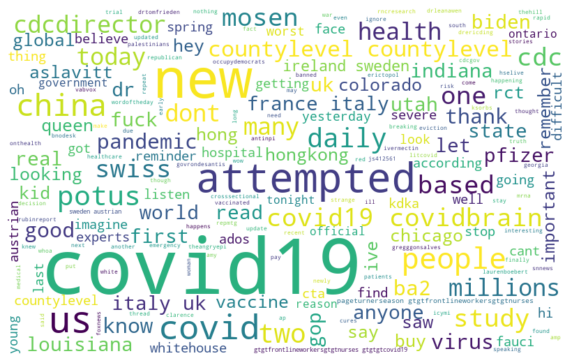

In [7]:
# Word Cloud for tweets that have negative sentiments
negative_tweets = tweet_dataset[tweet_dataset['sentiment'] == 'negative']

negative_corpus = []

for i in negative_tweets['text_cleaned']:
    tweet = word_tokenize(i)
    negative_corpus += [tweet[0]]
    
all_words = ' '.join([text for text in negative_corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

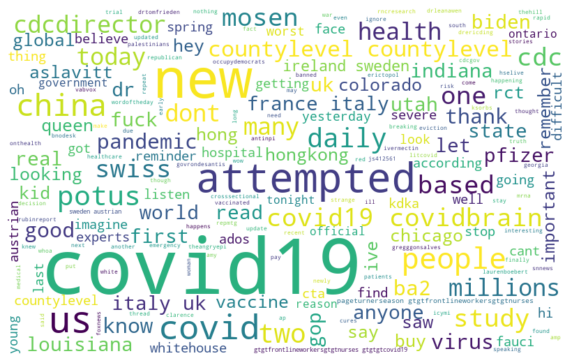

In [8]:
# Word Cloud for tweets that have neutral sentiments
neutral_tweets = tweet_dataset[tweet_dataset['sentiment'] == 'neutral']

neutral_corpus = []

for i in negative_tweets['text_cleaned']:
    tweet = word_tokenize(i)
    neutral_corpus += [tweet[0]]
    
all_words = ' '.join([text for text in neutral_corpus])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color="white").generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
# Most common words in Postive Corpus
from collections import Counter

#Count Most Frequent Words
Counter = Counter(positive_corpus)
most_occur = Counter.most_common(20) 
print(most_occur)

[('covid19', 147), ('new', 39), ('free', 32), ('’', 30), ('“', 29), ('great', 25), ('today', 22), ('thank', 20), ('michigandot', 18), ('two', 18), ('march', 18), ('join', 17), ('good', 17), ('latest', 16), ('happy', 16), ('time', 15), ('dear', 15), ('want', 14), ('get', 13), ('medical', 13)]


In [10]:
# Most common words in Negative Corpus
from collections import Counter

#Count Most Frequent Words
Counter = Counter(negative_corpus)
most_occur = Counter.most_common(20) 
print(most_occur)

[('since', 387), ('covid19', 107), ('new', 39), ('’', 22), ('attempted', 21), ('countylevel', 17), ('us', 17), ('“', 16), ('covid', 15), ('people', 11), ('uk', 10), ('potus', 10), ('daily', 9), ('two', 9), ('69', 9), ('china', 9), ('cdc', 8), ('mosen', 8), ('swiss', 8), ('covidbrain', 8)]


In [11]:
# Most common words in Neutral Corpus
from collections import Counter

#Count Most Frequent Words
Counter = Counter(neutral_corpus)
most_occur = Counter.most_common(20) 
print(most_occur)

[('since', 387), ('covid19', 107), ('new', 39), ('’', 22), ('attempted', 21), ('countylevel', 17), ('us', 17), ('“', 16), ('covid', 15), ('people', 11), ('uk', 10), ('potus', 10), ('daily', 9), ('two', 9), ('69', 9), ('china', 9), ('cdc', 8), ('mosen', 8), ('swiss', 8), ('covidbrain', 8)]


<AxesSubplot:xlabel='polarity', ylabel='Count'>

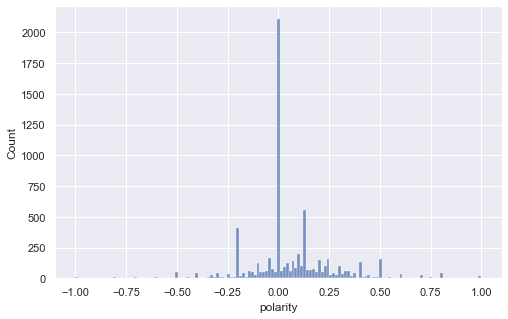

In [12]:
# plotting polarity distribution
import seaborn as sns
sns.histplot(data=tweet_dataset,
             x="polarity",
             color = "b")

<AxesSubplot:xlabel='subjectivity', ylabel='Count'>

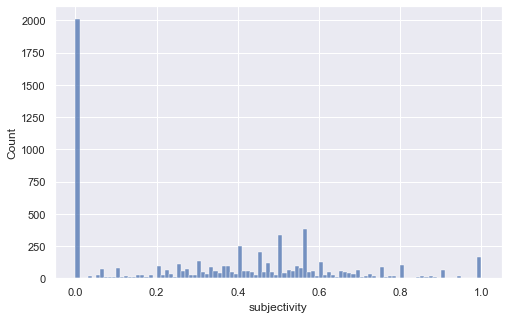

In [13]:
# plotting subjectivity distribution
import seaborn as sns
sns.histplot(data=tweet_dataset,
             x="subjectivity",
             color = "b", 
             bins = 100)

<AxesSubplot:xlabel='pos', ylabel='Count'>

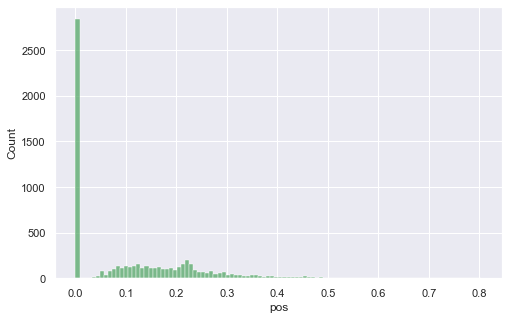

In [14]:
# plotting positivity distribution
import seaborn as sns
sns.histplot(data=tweet_dataset,
             x="pos",
             color = "g", 
             bins = 100)

<AxesSubplot:xlabel='neg', ylabel='Count'>

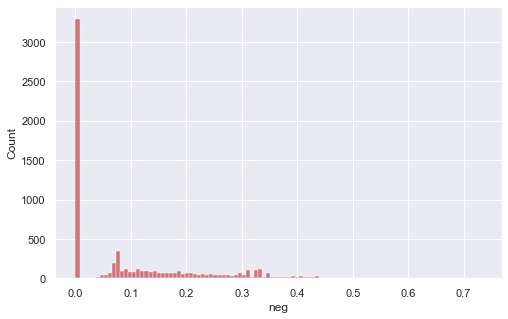

In [15]:
# plotting negativity distribution
import seaborn as sns
sns.histplot(data=tweet_dataset,
             x="neg",
             color = "r", 
             bins = 100)

<AxesSubplot:xlabel='neu', ylabel='Count'>

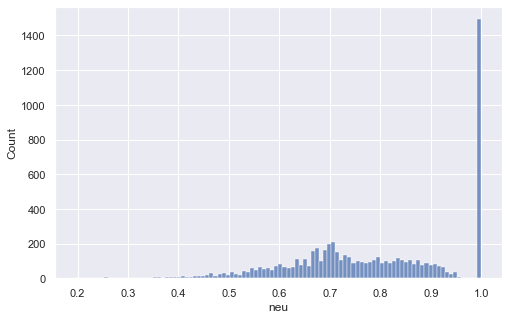

In [16]:
# plotting neutrality distribution
import seaborn as sns
sns.histplot(data=tweet_dataset,
             x="neu",
             color = "b", 
             bins = 100)

<AxesSubplot:xlabel='compound', ylabel='Count'>

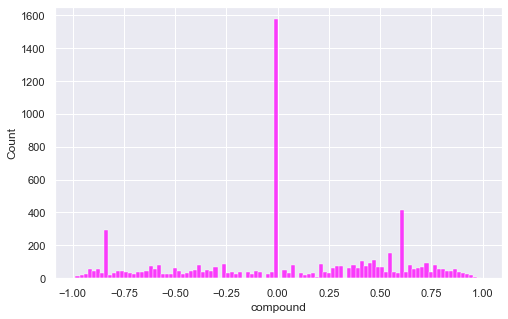

In [17]:
# plotting compound distribution
import seaborn as sns
sns.histplot(data=tweet_dataset,
             x="compound",
             color = "magenta", 
             bins = 100)

## Geo-Mapping

In [18]:
import plotly.express as px

fig = px.scatter_geo(tweet_dataset,lat='latitude',lon='longitude', hover_name="user.location")
fig.update_layout(title = 'Twitter #Covid-19 Tweet Locations - Past 7 Days', title_x=0.5)
fig.show()